In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from dataset import NASBench101Dataset

### Load dataset

In [4]:
build_size = 172  # TODO: check how those were selected
train_size = build_size * 0.8
dataset = NASBench101Dataset('data/nasbench101.hdf5', str(build_size)) 
dataset_all = NASBench101Dataset('data/nasbench101.hdf5', "all")

### Feature extraction

In [5]:
from utils import get_targets, get_flat_features, get_flat_features_boosted, get_gcn_features 

In [6]:
# Get train data features and targets
predictor_build_features = get_flat_features(dataset)
predictor_build_targets = get_targets(dataset)

# Get extended train data features (additional features) 
predictor_build_features_ext = get_flat_features_boosted(dataset)

# Get data for applying predictors
all_features = get_flat_features(dataset_all)
all_features_ext = get_flat_features_boosted(dataset_all)
all_targets = get_targets(dataset_all)

In [83]:
print("predictor_build_features.shape", predictor_build_features_ext.shape)

predictor_build_features.shape (172, 86)


In [7]:
train_features = predictor_build_features
train_targets = predictor_build_targets

train_features_ext = predictor_build_features_ext
train_targets_ext = predictor_build_targets

**Get 100k NAS-Bench-101 subset**

In [8]:
# Get subset random samples from the dataset
subset = 100_000
indices = np.random.choice(all_features.shape[0], subset, replace=False)

features_100k = all_features[indices]
features_100k_ext = all_features_ext[indices]
targets_100k = all_targets[indices]

## Training the predictors

In [9]:
from utils import measure_training_time

### Linear regression predictor (`LRPredictor`)

In [10]:
from predictors.linear_regression import LRPredictor

lr_predictor = LRPredictor()
train_time = measure_training_time(lr_predictor, train_features, train_targets, num_runs=3)


print(f"LR - Training time ({len(train_features)} samples): {train_time:.2f}s")

LR - Training time (172 samples): 0.01s


**Extended features**

In [11]:
lr_predictor_ext = LRPredictor()
train_time_ext = measure_training_time(lr_predictor_ext, train_features_ext, train_targets_ext, num_runs=3)

print(f"LR - Training time ({len(train_features_ext)} samples) for extended features: {train_time_ext:.2f}s")

LR - Training time (172 samples) for extended features: 0.01s


### Random forest predictor (`RFPredictor`)

In [12]:
from predictors.random_forest import RFPredictor

rf_predictor = RFPredictor()
train_time = measure_training_time(rf_predictor, train_features, train_targets, num_runs=3)

print(f"RF - Training time ({len(train_features)} samples): {train_time:.2f}s")

RF - Training time (172 samples): 0.10s


**Extended features**

In [13]:
rf_predictor_ext = RFPredictor()
train_time_ext = measure_training_time(rf_predictor_ext, train_features_ext, train_targets_ext, num_runs=3)

print(f"RF - Training time ({len(train_features_ext)} samples) for extended features: {train_time_ext:.2f}s")

RF - Training time (172 samples) for extended features: 0.10s


### XGBoost predictor

In [14]:
from predictors.xgb import XGBPredictor

xgb_predictor = XGBPredictor()
train_time = measure_training_time(xgb_predictor, train_features, train_targets, num_runs=3)

print(f"XGB - Training time ({len(train_features)} samples): {train_time:.2f}s")

XGB - Training time (172 samples): 0.10s


**Extended features**

In [15]:
xgb_predictor_ext = XGBPredictor()
train_time_ext = measure_training_time(xgb_predictor_ext, train_features_ext, train_targets_ext, num_runs=3)

print(f"XGB - Training time ({len(train_features_ext)} samples) for extended features: {train_time_ext:.2f}s")

XGB - Training time (172 samples) for extended features: 0.11s


### MLP predictor (`MLPPredictor`)

In [18]:
from predictors.mlp import MLPPredictor


mlp_predictor = MLPPredictor()
train_time = measure_training_time(mlp_predictor, train_features, train_targets, num_runs=3)

print(f"MLP - Training time ({len(train_features)} samples): {train_time:.2f}s")

[05/15 20:52:51] INFO (root) Epoch 1/500, Loss: 2.2084
[05/15 20:52:51] INFO (root) Epoch 2/500, Loss: 2.1830
[05/15 20:52:51] INFO (root) Epoch 3/500, Loss: 2.1588
[05/15 20:52:51] INFO (root) Epoch 4/500, Loss: 2.1346
[05/15 20:52:51] INFO (root) Epoch 5/500, Loss: 2.1117
[05/15 20:52:51] INFO (root) Epoch 6/500, Loss: 2.0883
[05/15 20:52:51] INFO (root) Epoch 7/500, Loss: 2.0644
[05/15 20:52:51] INFO (root) Epoch 8/500, Loss: 2.0394
[05/15 20:52:51] INFO (root) Epoch 9/500, Loss: 2.0097
[05/15 20:52:51] INFO (root) Epoch 10/500, Loss: 1.9760
[05/15 20:52:51] INFO (root) Epoch 11/500, Loss: 1.9144
[05/15 20:52:51] INFO (root) Epoch 12/500, Loss: 1.8063
[05/15 20:52:51] INFO (root) Epoch 13/500, Loss: 1.6808
[05/15 20:52:51] INFO (root) Epoch 14/500, Loss: 1.5626
[05/15 20:52:51] INFO (root) Epoch 15/500, Loss: 1.4377
[05/15 20:52:51] INFO (root) Epoch 16/500, Loss: 1.3815
[05/15 20:52:51] INFO (root) Epoch 17/500, Loss: 1.3459
[05/15 20:52:51] INFO (root) Epoch 18/500, Loss: 1.2916
[

**Extended features**

In [19]:
mlp_predictor_ext = MLPPredictor()
train_time_ext = measure_training_time(mlp_predictor_ext, train_features_ext, train_targets_ext, num_runs=3)

print(f"MLP - Training time ({len(train_features_ext)} samples) for extended features: {train_time_ext:.2f}s")

[05/15 20:54:03] INFO (root) Epoch 1/500, Loss: 1.9893
[05/15 20:54:03] INFO (root) Epoch 2/500, Loss: 1.9643
[05/15 20:54:03] INFO (root) Epoch 3/500, Loss: 1.9406
[05/15 20:54:03] INFO (root) Epoch 4/500, Loss: 1.9163
[05/15 20:54:03] INFO (root) Epoch 5/500, Loss: 1.8929
[05/15 20:54:03] INFO (root) Epoch 6/500, Loss: 1.8706
[05/15 20:54:03] INFO (root) Epoch 7/500, Loss: 1.8498
[05/15 20:54:03] INFO (root) Epoch 8/500, Loss: 1.8293
[05/15 20:54:03] INFO (root) Epoch 9/500, Loss: 1.8079
[05/15 20:54:03] INFO (root) Epoch 10/500, Loss: 1.7877
[05/15 20:54:03] INFO (root) Epoch 11/500, Loss: 1.7655
[05/15 20:54:03] INFO (root) Epoch 12/500, Loss: 1.7380
[05/15 20:54:03] INFO (root) Epoch 13/500, Loss: 1.7049
[05/15 20:54:03] INFO (root) Epoch 14/500, Loss: 1.6609
[05/15 20:54:03] INFO (root) Epoch 15/500, Loss: 1.5812
[05/15 20:54:03] INFO (root) Epoch 16/500, Loss: 1.4410
[05/15 20:54:03] INFO (root) Epoch 17/500, Loss: 1.2908
[05/15 20:54:03] INFO (root) Epoch 18/500, Loss: 1.1521
[

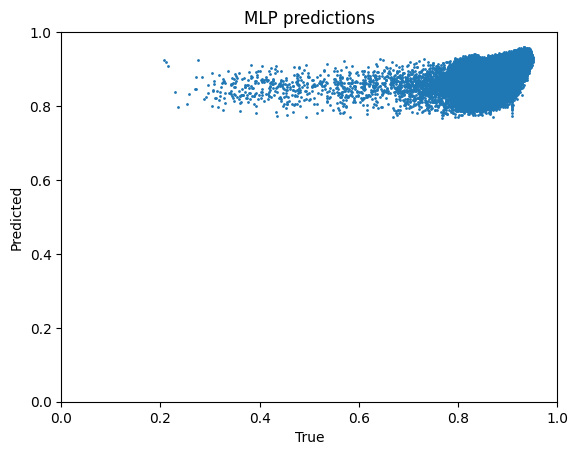

In [21]:
# Plot MLP predictions 
mlp_predictions = mlp_predictor.predict(all_features)
plt.scatter(all_targets, mlp_predictions, s=1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("MLP predictions")
plt.show()

### GCN predictor (`GCNPredictor`)

In [22]:
# TODO: necessary?
features_gcn = np.array(list([a for a in dataset]))
all_features_gcn = np.array(list([a for a in dataset_all]))

# For applying GCN predictor
features_gcn_100k = all_features_gcn[indices] # subset of nasbench101

In [23]:
train_features_gcn = features_gcn
train_targets_gcn = predictor_build_targets

In [24]:
from predictors.gcn import GCNPredictor

gcn_predictor = GCNPredictor()
train_time = measure_training_time(gcn_predictor, train_features_gcn, train_targets_gcn, num_runs=3)

print(f"GCN - Training time ({len(train_features)} samples): {train_time:.2f}s")

[05/15 20:56:10] INFO (root) Epoch 1/300, Loss: 1.0072, MSE: 7.0840
[05/15 20:56:10] INFO (root) Epoch 2/300, Loss: 1.0080, MSE: 7.0897
[05/15 20:56:10] INFO (root) Epoch 3/300, Loss: 1.0079, MSE: 7.0889
[05/15 20:56:10] INFO (root) Epoch 4/300, Loss: 1.0065, MSE: 7.0790
[05/15 20:56:11] INFO (root) Epoch 5/300, Loss: 1.0051, MSE: 7.0689
[05/15 20:56:11] INFO (root) Epoch 6/300, Loss: 1.0033, MSE: 7.0565
[05/15 20:56:11] INFO (root) Epoch 7/300, Loss: 1.0012, MSE: 7.0412
[05/15 20:56:11] INFO (root) Epoch 8/300, Loss: 0.9993, MSE: 7.0279
[05/15 20:56:11] INFO (root) Epoch 9/300, Loss: 0.9965, MSE: 7.0087
[05/15 20:56:11] INFO (root) Epoch 10/300, Loss: 0.9836, MSE: 6.9180
[05/15 20:56:12] INFO (root) Epoch 11/300, Loss: 0.9816, MSE: 6.9038
[05/15 20:56:12] INFO (root) Epoch 12/300, Loss: 0.9779, MSE: 6.8780
[05/15 20:56:12] INFO (root) Epoch 13/300, Loss: 0.9729, MSE: 6.8426
[05/15 20:56:12] INFO (root) Epoch 14/300, Loss: 0.9663, MSE: 6.7958
[05/15 20:56:12] INFO (root) Epoch 15/300, 

## Predictor Evaluation

### 100k set basic

In [25]:
from utils import measure_query_time

In [26]:
# Collect this data - later create latex table
all_models_100k, all_metrics_100k = [], []

In [27]:
# LR metrics
prediction_time = measure_query_time(lr_predictor, features_100k, targets_100k, num_runs=3)

lr_metrics = lr_predictor.evaluate(features_100k, targets_100k)
lr_metrics = {k: round(v, 5) for k, v in lr_metrics.items()}
all_models_100k.append("Linear Regression")
all_metrics_100k.append(lr_metrics)

print(lr_metrics)
print(f"LR - Prediction time ({len(features_100k)}) samples): {prediction_time:.2f}s")

{'rmse': 27.44308, 'mae': 0.3917, 'mse': 753.12275, 'pearson': 0.001, 'spearman': 0.66174, 'kendalltau': 0.47658, 'r2_score': -879482.99167}
LR - Prediction time (100000) samples): 0.01s


In [28]:
# RF metrics
prediction_time = measure_query_time(rf_predictor, features_100k, targets_100k, num_runs=3)

rf_metrics = rf_predictor.evaluate(features_100k, targets_100k)
rf_metrics = {k: round(v, 5) for k, v in rf_metrics.items()}
all_models_100k.append("Random Forest")
all_metrics_100k.append(rf_metrics)

print(rf_metrics)
print(f"RF - Prediction time ({len(features_100k)}) samples): {prediction_time:.2f}s")

{'rmse': 0.02378, 'mae': 0.01401, 'mse': 0.00057, 'pearson': 0.62456, 'spearman': 0.68481, 'kendalltau': 0.49809, 'r2_score': 0.33942}
RF - Prediction time (100000) samples): 0.80s


In [29]:
# XGB metrics
prediction_time = measure_query_time(xgb_predictor, features_100k, targets_100k, num_runs=3)

xgb_metrics = xgb_predictor.evaluate(features_100k, targets_100k)
xgb_metrics = {k: round(v, 5) for k, v in xgb_metrics.items()}
all_models_100k.append("XGBoost")
all_metrics_100k.append(xgb_metrics)

print(xgb_metrics)
print(f"XGB - Prediction time ({len(features_100k)}) samples): {prediction_time:.2f}s")

{'rmse': 0.02537, 'mae': 0.01506, 'mse': 0.00064, 'pearson': 0.52801, 'spearman': 0.63704, 'kendalltau': 0.45595, 'r2_score': 0.24845}
XGB - Prediction time (100000) samples): 0.07s


In [30]:
# MLP metrics
prediction_time = measure_query_time(mlp_predictor, features_100k, targets_100k, num_runs=3)

mlp_metrics = mlp_predictor.evaluate(features_100k, targets_100k)
mlp_metrics = {k: round(v, 5) for k, v in mlp_metrics.items()}
all_models_100k.append("MLP")
all_metrics_100k.append(mlp_metrics)

print(mlp_metrics)
print(f"MLP - Prediction time ({len(features_100k)}) samples): {prediction_time:.2f}s")

{'rmse': 0.02422, 'mae': 0.01479, 'mse': 0.00059, 'pearson': 0.60462, 'spearman': 0.67171, 'kendalltau': 0.48429, 'r2_score': 0.31469}
MLP - Prediction time (100000) samples): 1.41s


**Print results**

In [31]:
from utils import create_latex_table

In [32]:
print(all_models_100k)
print(all_metrics_100k)
create_latex_table(all_metrics_100k, all_models_100k)

['Linear Regression', 'Random Forest', 'XGBoost', 'MLP']
[{'rmse': 27.44308, 'mae': 0.3917, 'mse': 753.12275, 'pearson': 0.001, 'spearman': 0.66174, 'kendalltau': 0.47658, 'r2_score': -879482.99167}, {'rmse': 0.02378, 'mae': 0.01401, 'mse': 0.00057, 'pearson': 0.62456, 'spearman': 0.68481, 'kendalltau': 0.49809, 'r2_score': 0.33942}, {'rmse': 0.02537, 'mae': 0.01506, 'mse': 0.00064, 'pearson': 0.52801, 'spearman': 0.63704, 'kendalltau': 0.45595, 'r2_score': 0.24845}, {'rmse': 0.02422, 'mae': 0.01479, 'mse': 0.00059, 'pearson': 0.60462, 'spearman': 0.67171, 'kendalltau': 0.48429, 'r2_score': 0.31469}]


"\\begin{table}[h]\n\\centering\n\\caption{Performance Metrics of Predictors with Basic Feature Set}\n    \\begin{tabular}{lccccc}\n    \\hline\n    \\textbf{Predictor} & \\textbf{MSE} & \\textbf{MAE} & \\textbf{Pearson} & \\textbf{Kendall's $\\tau$} & \\textbf{$R^2$} \\\\\n    \\hline\n    Linear Regression & 753.1227 & 0.3917 & 0.0010 & 0.4766 & -879482.9917 \\\\\n    Random Forest & 0.0006 & 0.0140 & 0.6246 & 0.4981 & 0.3394 \\\\\n    XGBoost & 0.0006 & 0.0151 & 0.5280 & 0.4560 & 0.2485 \\\\\n    MLP & 0.0006 & 0.0148 & 0.6046 & 0.4843 & 0.3147 \\\\\n    \\hline\n    \\end{tabular}\n\\label{tab:metrics_basic}\n\\end{table}"

### 100k set extended

In [33]:
# Collect this data - later create latex table
all_models_100k_ext, all_metrics_100k_ext = [], []

In [34]:
# LR metrics
prediction_time = measure_query_time(lr_predictor_ext, features_100k_ext, targets_100k, num_runs=3)

lr_metrics = lr_predictor_ext.evaluate(features_100k_ext, targets_100k)
lr_metrics = {k: round(v, 5) for k, v in lr_metrics.items()}
all_models_100k_ext.append("Linear Regression")
all_metrics_100k_ext.append(lr_metrics)

print(lr_metrics)
print(f"LR - Prediction time ({len(features_100k)}) samples): {prediction_time:.2f}s")

{'rmse': 171579058.53785, 'mae': 2369693.47314, 'mse': 2.943937332873405e+16, 'pearson': -0.0003, 'spearman': -0.3647, 'kendalltau': -0.23251, 'r2_score': -3.437880156556118e+19}
LR - Prediction time (100000) samples): 0.02s


In [35]:
# RF metrics
prediction_time = measure_query_time(rf_predictor_ext, features_100k_ext, targets_100k, num_runs=3)

rf_metrics = rf_predictor_ext.evaluate(features_100k_ext, targets_100k)
rf_metrics = {k: round(v, 5) for k, v in rf_metrics.items()}
all_models_100k_ext.append("Random Forest")
all_metrics_100k_ext.append(rf_metrics)

print(rf_metrics)
print(f"RF - Prediction time ({len(features_100k)}) samples) for extended features: {prediction_time:.2f}s")

{'rmse': 0.02226, 'mae': 0.01252, 'mse': 0.0005, 'pearson': 0.66833, 'spearman': 0.75854, 'kendalltau': 0.56307, 'r2_score': 0.42152}
RF - Prediction time (100000) samples) for extended features: 0.77s


In [36]:
# XGB metrics
prediction_time = measure_query_time(xgb_predictor_ext, features_100k_ext, targets_100k, num_runs=3)

xgb_metrics = xgb_predictor_ext.evaluate(features_100k_ext, targets_100k)
xgb_metrics = {k: round(v, 5) for k, v in xgb_metrics.items()}
all_models_100k_ext.append("XGBoost")
all_metrics_100k_ext.append(xgb_metrics)

print(xgb_metrics)
print(f"XGB - Prediction time ({len(features_100k)}) samples) for extended features: {prediction_time:.2f}s")

{'rmse': 0.02246, 'mae': 0.0126, 'mse': 0.0005, 'pearson': 0.64395, 'spearman': 0.76539, 'kendalltau': 0.56679, 'r2_score': 0.41071}
XGB - Prediction time (100000) samples) for extended features: 0.07s


In [37]:
# MLP metrics
prediction_time = measure_query_time(mlp_predictor_ext, features_100k_ext, targets_100k, num_runs=3)

mlp_metrics = mlp_predictor_ext.evaluate(features_100k_ext, targets_100k)
mlp_metrics = {k: round(v, 5) for k, v in mlp_metrics.items()}
all_models_100k_ext.append("MLP")
all_metrics_100k_ext.append(mlp_metrics)

print(mlp_metrics)
print(f"MLP - Prediction time ({len(features_100k)}) samples) for extended features: {prediction_time:.2f}s")

{'rmse': 0.02204, 'mae': 0.01302, 'mse': 0.00049, 'pearson': 0.66184, 'spearman': 0.70949, 'kendalltau': 0.5178, 'r2_score': 0.43266}
MLP - Prediction time (100000) samples) for extended features: 1.20s


In [38]:
# GCN metrics
prediction_time = measure_query_time(gcn_predictor, features_gcn_100k, targets_100k, num_runs=3)

gcn_metrics = gcn_predictor.evaluate(features_gcn_100k, targets_100k)
gcn_metrics = {k: round(v, 5) for k, v in gcn_metrics.items()}
all_models_100k_ext.append("GCN")
all_metrics_100k_ext.append(gcn_metrics)

print(gcn_metrics)
print(f"GCN - Prediction time ({len(features_gcn_100k)}) samples): {prediction_time:.2f}s")

c:\Users\simon\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\_utils\collate.py:176: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:233.)
  return torch.as_tensor(batch)


{'rmse': 0.01786, 'mae': 0.00974, 'mse': 0.00032, 'pearson': 0.80181, 'spearman': 0.83831, 'kendalltau': 0.64982, 'r2_score': 0.62755}
GCN - Prediction time (100000) samples): 3.07s


**Print results**

In [39]:
from utils import create_latex_table

In [40]:
print(all_models_100k_ext)
print(all_metrics_100k_ext)
create_latex_table(all_metrics_100k_ext, all_models_100k_ext)

['Linear Regression', 'Random Forest', 'XGBoost', 'MLP', 'GCN']
[{'rmse': 171579058.53785, 'mae': 2369693.47314, 'mse': 2.943937332873405e+16, 'pearson': -0.0003, 'spearman': -0.3647, 'kendalltau': -0.23251, 'r2_score': -3.437880156556118e+19}, {'rmse': 0.02226, 'mae': 0.01252, 'mse': 0.0005, 'pearson': 0.66833, 'spearman': 0.75854, 'kendalltau': 0.56307, 'r2_score': 0.42152}, {'rmse': 0.02246, 'mae': 0.0126, 'mse': 0.0005, 'pearson': 0.64395, 'spearman': 0.76539, 'kendalltau': 0.56679, 'r2_score': 0.41071}, {'rmse': 0.02204, 'mae': 0.01302, 'mse': 0.00049, 'pearson': 0.66184, 'spearman': 0.70949, 'kendalltau': 0.5178, 'r2_score': 0.43266}, {'rmse': 0.01786, 'mae': 0.00974, 'mse': 0.00032, 'pearson': 0.80181, 'spearman': 0.83831, 'kendalltau': 0.64982, 'r2_score': 0.62755}]


"\\begin{table}[h]\n\\centering\n\\caption{Performance Metrics of Predictors with Basic Feature Set}\n    \\begin{tabular}{lccccc}\n    \\hline\n    \\textbf{Predictor} & \\textbf{MSE} & \\textbf{MAE} & \\textbf{Pearson} & \\textbf{Kendall's $\\tau$} & \\textbf{$R^2$} \\\\\n    \\hline\n    Linear Regression & 29439373328734048.0000 & 2369693.4731 & -0.0003 & -0.2325 & -34378801565561180160.0000 \\\\\n    Random Forest & 0.0005 & 0.0125 & 0.6683 & 0.5631 & 0.4215 \\\\\n    XGBoost & 0.0005 & 0.0126 & 0.6440 & 0.5668 & 0.4107 \\\\\n    MLP & 0.0005 & 0.0130 & 0.6618 & 0.5178 & 0.4327 \\\\\n    GCN & 0.0003 & 0.0097 & 0.8018 & 0.6498 & 0.6276 \\\\\n    \\hline\n    \\end{tabular}\n\\label{tab:metrics_basic}\n\\end{table}"

In [80]:
for model, metrics in zip(all_models_100k_ext, all_metrics_100k_ext):
    mse = metrics["mse"]
    mae = metrics["mae"]
    pearson = metrics["pearson"]
    kendalltau = metrics["kendalltau"]
    r2 = metrics["r2_score"]
    print(f"{model} & Extended & {mse:.4f} & {mae:.4f} & {pearson:.4f} & {kendalltau:.4f} & {r2:.4f} \\\\")

Linear Regression & Extended & 29439373328734048.0000 & 2369693.4731 & -0.0003 & -0.2325 & -34378801565561180160.0000 \\
Random Forest & Extended & 0.0005 & 0.0125 & 0.6683 & 0.5631 & 0.4215 \\
XGBoost & Extended & 0.0005 & 0.0126 & 0.6440 & 0.5668 & 0.4107 \\
MLP & Extended & 0.0005 & 0.0130 & 0.6618 & 0.5178 & 0.4327 \\
GCN & Extended & 0.0003 & 0.0097 & 0.8018 & 0.6498 & 0.6276 \\


In [81]:
for model, metrics in zip(all_models_100k, all_metrics_100k):
    mse = metrics["mse"]
    mae = metrics["mae"]
    pearson = metrics["pearson"]
    kendalltau = metrics["kendalltau"]
    r2 = metrics["r2_score"]
    print(f"{model} & Standard & {mse:.4f} & {mae:.4f} & {pearson:.4f} & {kendalltau:.4f} & {r2:.4f} \\\\")

Linear Regression & Standard & 753.1227 & 0.3917 & 0.0010 & 0.4766 & -879482.9917 \\
Random Forest & Standard & 0.0006 & 0.0140 & 0.6246 & 0.4981 & 0.3394 \\
XGBoost & Standard & 0.0006 & 0.0151 & 0.5280 & 0.4560 & 0.2485 \\
MLP & Standard & 0.0006 & 0.0148 & 0.6046 & 0.4843 & 0.3147 \\


## Apply the predictors

In [41]:
from utils import scatter_plot_nice

In [42]:
targets_100k_scaled = targets_100k * 100

### Linear regression predictor

In [43]:
lr_predictions = lr_predictor.predict(features_100k)
lr_predictions_scaled = lr_predictions * 100

In [44]:
# Print number of predictions outside of [0, 100]
print("Number of predictions outside of [0, 100]: " + str(len(lr_predictions_scaled[(lr_predictions_scaled < 0) | (lr_predictions_scaled > 100)])))

Number of predictions outside of [0, 100]: 19


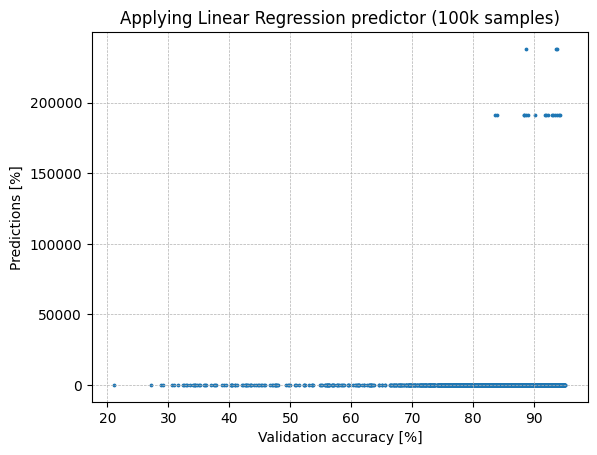

In [45]:
plt.scatter(targets_100k_scaled, lr_predictions_scaled, s=3)
plt.xlabel("Validation accuracy [%]")
plt.ylabel("Predictions [%]")
# plt.xlim(90, 100)
# plt.ylim(90, 100)
plt.grid(linestyle='--', linewidth=0.5)
plt.title("Applying Linear Regression predictor (100k samples)")
plt.savefig("imgs/lr_train172.pdf")
plt.show()

In [46]:
lr_predictions_ext = lr_predictor_ext.predict(features_100k_ext)
lr_predictions_scaled_ext = lr_predictions_ext * 100

In [47]:
# Count predictions outside of [0, 100]
lr_predictions_ext_outside = np.count_nonzero((lr_predictions_scaled_ext < 0) | (lr_predictions_scaled_ext > 100))
print(f"Predictions outside of [0, 100]: {lr_predictions_ext_outside}")

Predictions outside of [0, 100]: 100000


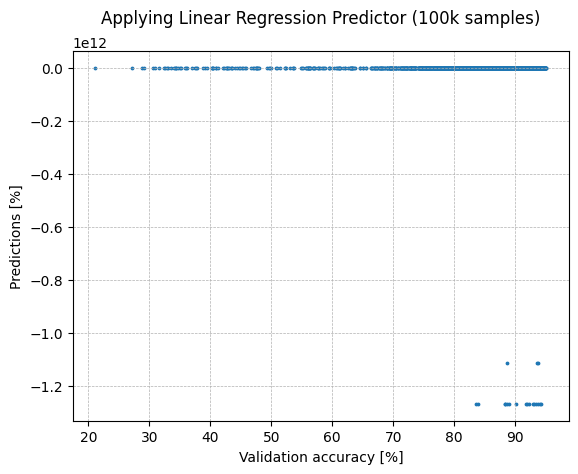

In [92]:
plt.scatter(targets_100k_scaled, lr_predictions_scaled_ext, s=3)
plt.xlabel("Validation accuracy [%]")
plt.ylabel("Predictions [%]")
plt.grid(linestyle='--', linewidth=0.5)
plt.title("Applying Linear Regression Predictor (100k samples)", pad=20)
plt.savefig("imgs/lr_train172ext.pdf")
plt.show()

### Random forest predictor

In [49]:
rf_predictions = rf_predictor.predict(features_100k)
rf_predictions_scaled = rf_predictions * 100

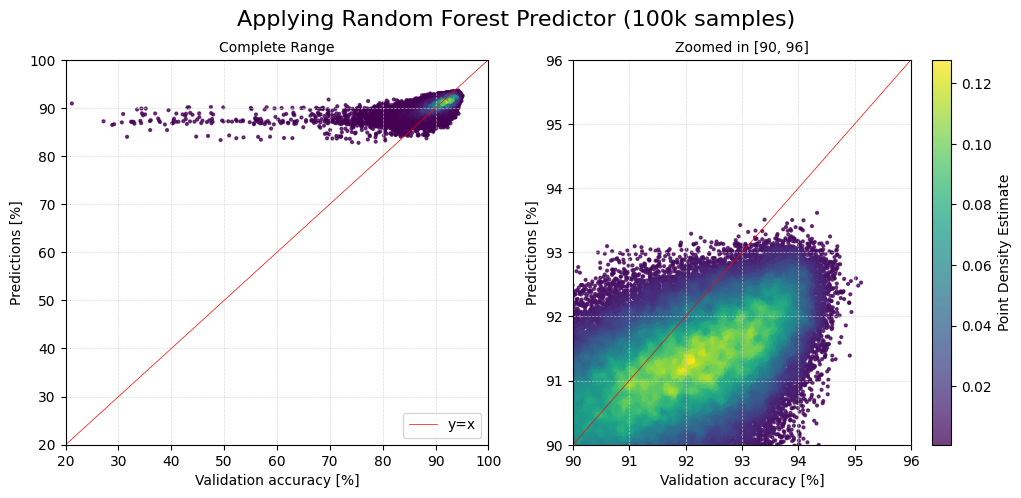

In [50]:

scatter_plot_nice(targets_100k_scaled, rf_predictions_scaled, "Applying Random Forest Predictor (100k samples)", dense=True, save=True, filename="rf_train172.pdf")

In [51]:
rf_predictions_ext = rf_predictor_ext.predict(features_100k_ext)
rf_predictions_scaled_ext = rf_predictions_ext * 100

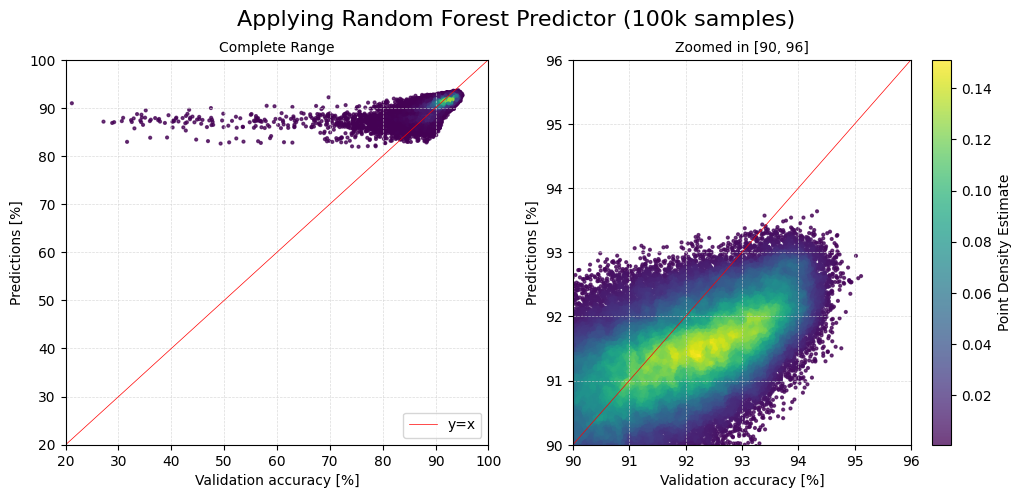

In [91]:
scatter_plot_nice(targets_100k_scaled, rf_predictions_scaled_ext, "Applying Random Forest Predictor (100k samples)", dense=True, save=True, filename="rf_train172ext.pdf")

### XGBoost predictor

In [52]:
xgb_predictions = xgb_predictor.predict(features_100k)
xgb_predictions_scaled = xgb_predictions * 100

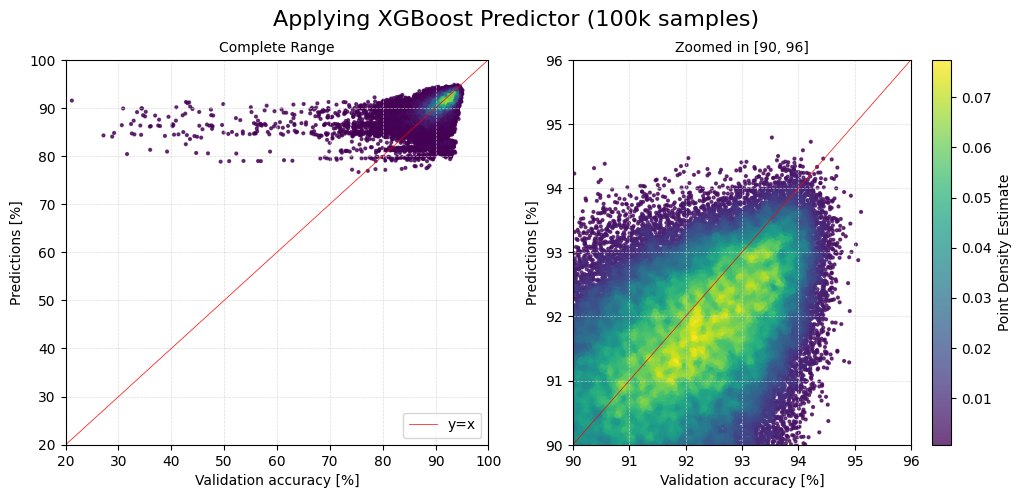

In [53]:

scatter_plot_nice(targets_100k_scaled, xgb_predictions_scaled, "Applying XGBoost Predictor (100k samples)", dense=True, save=True, filename="xgb_train172.pdf")

In [54]:
xgb_predictions_ext = xgb_predictor_ext.predict(features_100k_ext)
xgb_predictions_scaled_ext = xgb_predictions_ext * 100

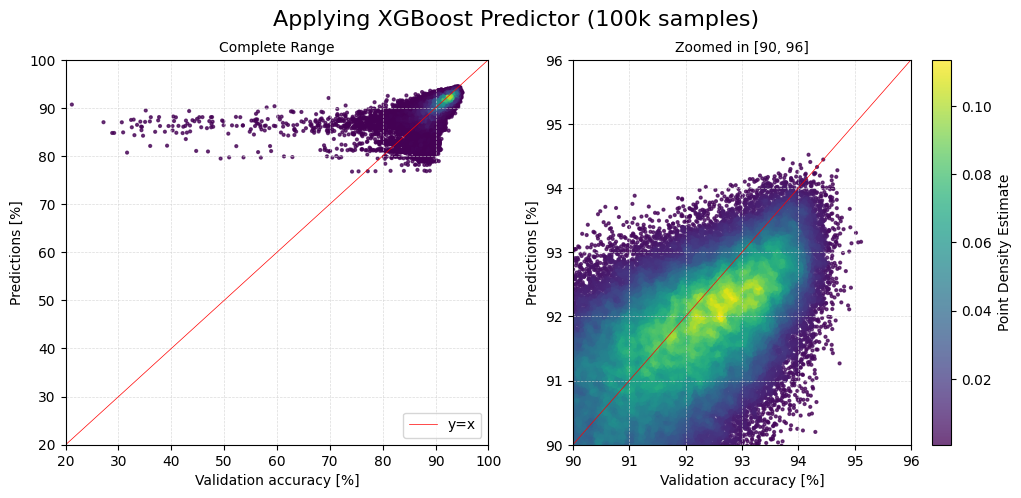

In [90]:
scatter_plot_nice(targets_100k_scaled, xgb_predictions_scaled_ext, "Applying XGBoost Predictor (100k samples)", dense=True, save=True, filename="xgb_train172ext.pdf")

### MLP predictor

In [55]:
mlp_predictions = mlp_predictor.predict(features_100k)
mlp_predictions_scaled = mlp_predictions * 100

In [56]:
# plt.scatter(targets_100k_scaled, mlp_predictions_scaled, s=1)
# plt.xlabel("Actual values [%]")
# plt.ylabel("Predicted values [%]")
# plt.title("Validation accuracy predictions (MLP)")
# plt.grid(linestyle='--', linewidth=0.5)
# plt.xlim(0, 96)
# plt.ylim(0, 96)
# plt.show()

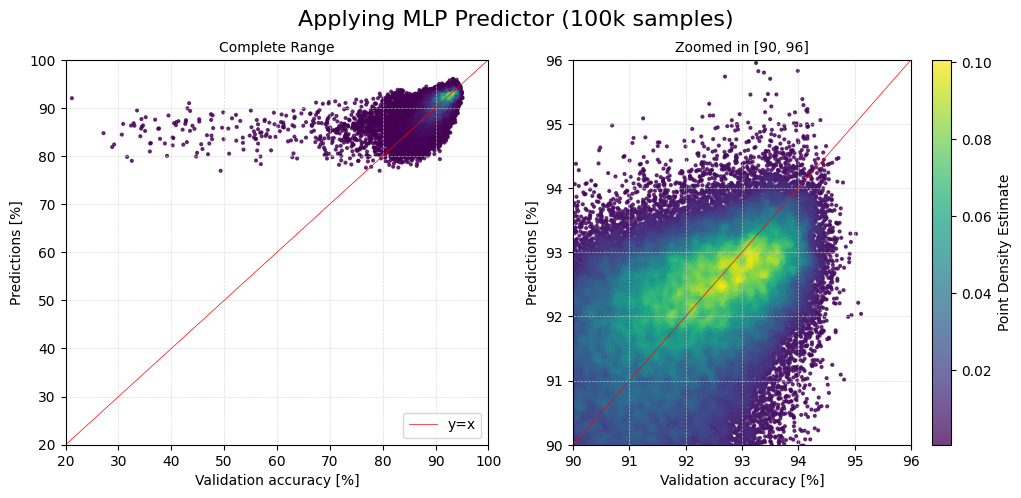

In [57]:
scatter_plot_nice(targets_100k_scaled, mlp_predictions_scaled, "Applying MLP Predictor (100k samples)", dense=True, save=True, filename="mlp_train172.pdf")

In [58]:
mlp_predictions_ext = mlp_predictor_ext.predict(features_100k_ext)
mlp_predictions_scaled_ext = mlp_predictions_ext * 100

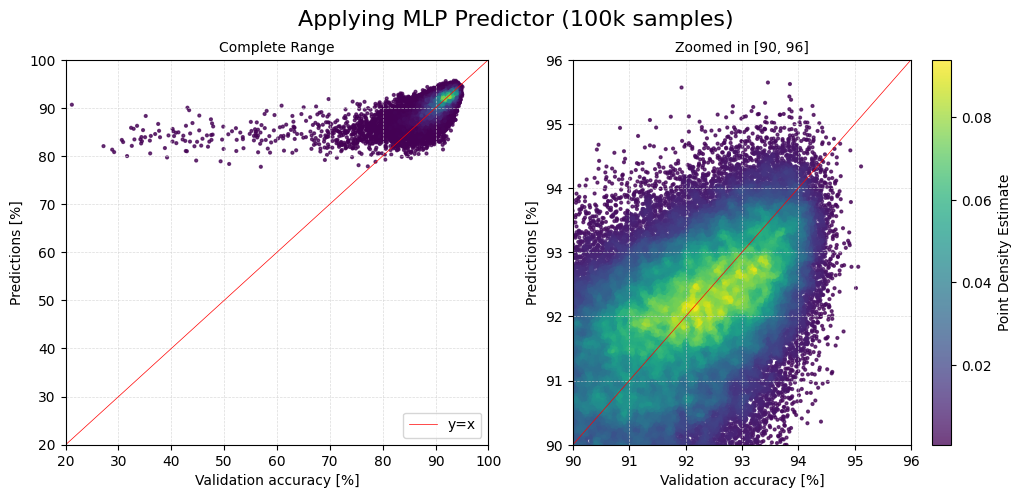

In [89]:
scatter_plot_nice(targets_100k_scaled, mlp_predictions_scaled_ext, "Applying MLP Predictor (100k samples)", dense=True, save=True, filename="mlp_train172ext.pdf")

In [59]:
from sklearn.neighbors import KernelDensity

In [60]:
cmap = 'viridis'
rf_data = np.vstack([targets_100k_scaled, rf_predictions_scaled]).T
xgb_data = np.vstack([targets_100k_scaled, xgb_predictions_scaled]).T
mlp_data = np.vstack([targets_100k_scaled, mlp_predictions_scaled]).T

rf_kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(rf_data)
rf_z = np.exp(rf_kde.score_samples(rf_data))

xgb_kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(xgb_data)
xgb_z = np.exp(xgb_kde.score_samples(xgb_data))

mlp_kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(mlp_data)
mlp_z = np.exp(mlp_kde.score_samples(mlp_data))

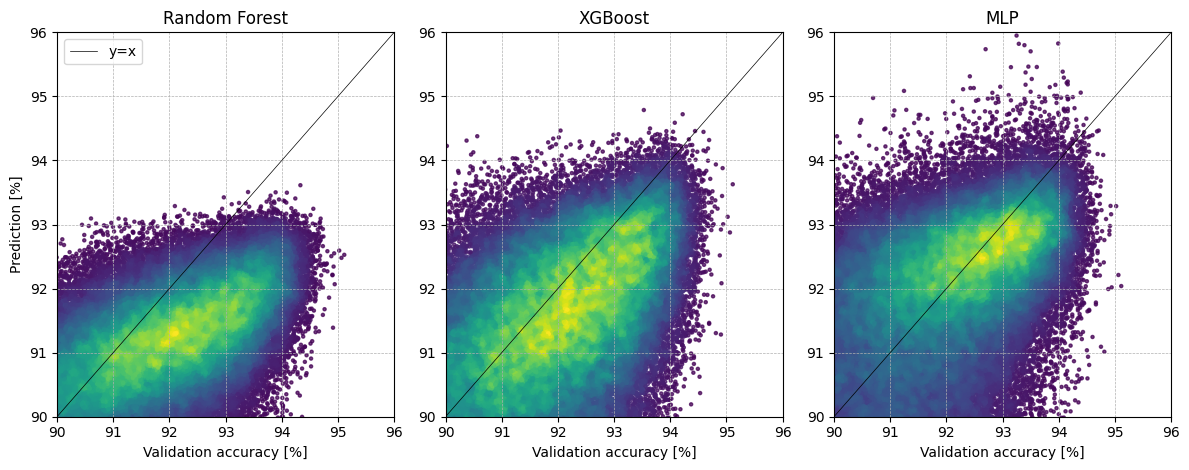

In [93]:
# Create figure (empty canvas)
fig = plt.figure()
fig.set_figwidth(12)

ax1 = fig.add_subplot(131) 
ax1.scatter(targets_100k_scaled, rf_predictions_scaled, s=5, c=rf_z, cmap=cmap, alpha=0.75)
ax1.set_title('Random Forest')
ax1.set_xlim([90, 96])
ax1.set_ylim([90, 96])
ax1.grid(linestyle='--', linewidth=0.5)
ax1.plot([90, 96], [90, 96], color='black', linestyle='-', linewidth=0.5, label='y=x')
ax1.legend()
ax1.set_xlabel("Validation accuracy [%]")
ax1.set_ylabel("Prediction [%]")

ax2 = fig.add_subplot(132) 
ax2.scatter(targets_100k_scaled, xgb_predictions_scaled, s=5, c=xgb_z, cmap=cmap, alpha=0.75)
ax2.set_title('XGBoost')
ax2.set_xlim([90, 96])
ax2.set_ylim([90, 96])
ax2.grid(linestyle='--', linewidth=0.5)
ax2.plot([90, 96], [90, 96], color='black', linestyle='-', linewidth=0.5)
ax2.set_xlabel("Validation accuracy [%]")

ax3 = fig.add_subplot(133)  
ax3.scatter(targets_100k_scaled, mlp_predictions_scaled, s=5, c=mlp_z, cmap=cmap, alpha=0.75)
ax3.set_title('MLP')   
ax3.set_xlim([90, 96])
ax3.set_ylim([90, 96])
ax3.grid(linestyle='--', linewidth=0.5)
ax3.plot([90, 96], [90, 96], color='black', linestyle='-', linewidth=0.5)
ax3.set_xlabel("Validation accuracy [%]")

# TODO: mention that colorbar was avoided for better visibility

# Adjust subplots to provide spacing
plt.tight_layout()

plt.savefig("imgs/combined_train172.pdf")

# Show the figure with subplots
plt.show()

### Extended features

In [62]:
# cmap = 'viridis'
# rf_data = np.vstack([targets_100k_scaled, rf_predictions_scaled_ext]).T
# xgb_data = np.vstack([targets_100k_scaled, xgb_predictions_scaled_ext]).T
# mlp_data = np.vstack([targets_100k_scaled, mlp_predictions_scaled_ext]).T

# rf_kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(rf_data)
# rf_z = np.exp(rf_kde.score_samples(rf_data))

# xgb_kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(xgb_data)
# xgb_z = np.exp(xgb_kde.score_samples(xgb_data))

# mlp_kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(mlp_data)
# mlp_z = np.exp(mlp_kde.score_samples(mlp_data))

In [63]:
# # Create figure (empty canvas)
# fig = plt.figure()
# fig.set_figwidth(12)

# ax1 = fig.add_subplot(131) 
# ax1.scatter(targets_100k_scaled, rf_predictions_scaled, s=5, c='black', alpha=0.3)
# ax1.scatter(targets_100k_scaled, rf_predictions_scaled_ext, s=5, c=rf_z, cmap=cmap, alpha=0.75)
# ax1.set_title('Random Forest')
# ax1.set_xlim([90, 96])
# ax1.set_ylim([90, 96])
# ax1.grid(linestyle='--', linewidth=0.5)
# ax1.plot([90, 96], [90, 96], color='black', linestyle='-', linewidth=0.5, label='y=x')
# ax1.legend()
# ax1.set_xlabel("Validation accuracy [%]")
# ax1.set_ylabel("Prediction [%]")

# ax2 = fig.add_subplot(132) 
# ax2.scatter(targets_100k_scaled, xgb_predictions_scaled, s=5, c='black', alpha=0.3)
# ax2.scatter(targets_100k_scaled, xgb_predictions_scaled_ext, s=5, c=xgb_z, cmap=cmap, alpha=0.75)
# ax2.set_title('XGBoost')
# ax2.set_xlim([90, 96])
# ax2.set_ylim([90, 96])
# ax2.grid(linestyle='--', linewidth=0.5)
# ax2.plot([90, 96], [90, 96], color='black', linestyle='-', linewidth=0.5)
# ax2.set_xlabel("Validation accuracy [%]")

# ax3 = fig.add_subplot(133)  
# ax3.scatter(targets_100k_scaled, mlp_predictions_scaled, s=5, c='black', alpha=0.3)
# ax3.scatter(targets_100k_scaled, mlp_predictions_scaled_ext, s=5, c=mlp_z, cmap=cmap, alpha=0.75)
# ax3.set_title('MLP')   
# ax3.set_xlim([90, 96])
# ax3.set_ylim([90, 96])
# ax3.grid(linestyle='--', linewidth=0.5)
# ax3.plot([90, 96], [90, 96], color='black', linestyle='-', linewidth=0.5)
# ax3.set_xlabel("Validation accuracy [%]")

# # TODO: mention that colorbar was avoided for better visibility

# # Adjust subplots to provide spacing
# plt.tight_layout()

# # Show the figure with subplots
# plt.show()

### GCN predictor

In [64]:
dataset_all = NASBench101Dataset('data/nasbench101.hdf5')
gcn_features_all = [a for a in dataset_all]
gcn_targets_all = get_targets(dataset_all)

In [65]:
gcn_predictions = gcn_predictor.predict(features_gcn_100k)
gcn_predictions_scaled = gcn_predictions * 100 

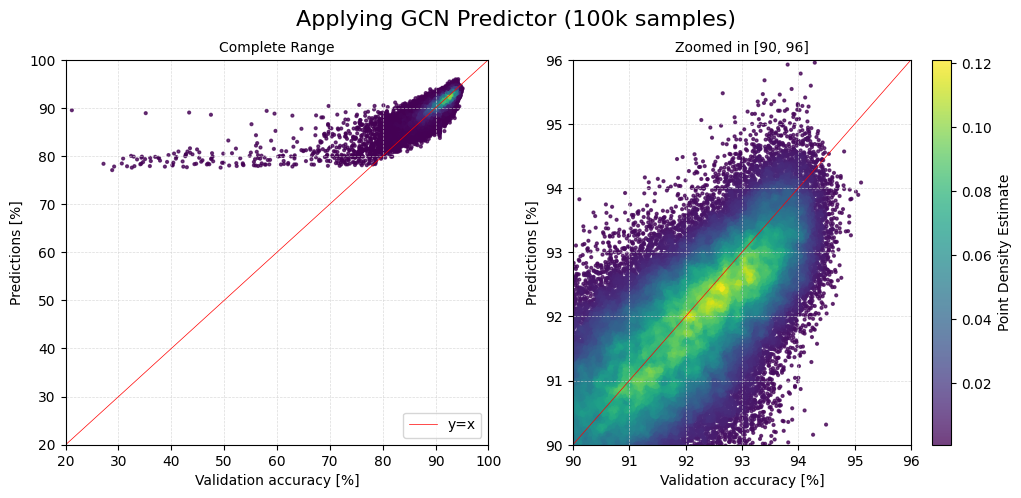

In [67]:

scatter_plot_nice(targets_100k_scaled, gcn_predictions_scaled, "Applying GCN Predictor (100k samples)", dense=True, save=True, filename="gcn_train172.pdf")

## Time speedup

In [88]:
# Get training time for CNNs in indices
# archs = [arch for arch in dataset_all]
# arch_100k = archs[indices]

training_times = [dataset_all[i]['training_time'] for i in indices]
training_times = np.array(training_times)

# Get total training time for CNNs in indices 
total_training_time_100k = training_times.sum()
print("Total training time for 100k samples: ", total_training_time_100k, " seconds")
# Print hours
print("Total training time for 100k samples: ", total_training_time_100k / 3600, " hours")
# Print days
print("Total training time for 100k samples: ", total_training_time_100k / 3600 / 24, " days")
# Print weeks
print("Total training time for 100k samples: ", total_training_time_100k / 3600 / 24 / 7, " weeks")
# Print years 
print("Total training time for 100k samples: ", total_training_time_100k / 3600 / 24 / 365, " years")
# Calculate speedup using GCN predictor
# gcn_time = gcn_init_time + gcn_predict_time
# speedup_100k = total_training_time_100k / gcn_time

Total training time for 100k samples:  193512370.0  seconds
Total training time for 100k samples:  53753.43555555555  hours
Total training time for 100k samples:  2239.726481481481  days
Total training time for 100k samples:  319.9609259259259  weeks
Total training time for 100k samples:  6.136236935565702  years


In [84]:
# Train time of 172 samples
train_times_172 = [arch['training_time'] for arch in dataset]
print("Total training time for 172 samples: ", sum(train_times_172), " seconds")

Total training time for 172 samples:  350385.57696533203  seconds


In [87]:
all_train_times = [arch['training_time'] for arch in dataset_all]
# Print mean training time
print("Mean training time for all samples: ", np.mean(all_train_times), " seconds")

Mean training time for all samples:  1932.0066  seconds
